In [1]:
import sys

sys.path.append("/home/ptbadia/code/tfg/tfg_ttcross")

In [2]:
from u1link.u11link import ObservablesU11 as obs
from u1link.u11link import U11linkModel as u11
from u1link.u11link import U1NlinkModel as u1n
from tt_cross.src.regular_tt_cross.integrators import ttrc_integrator, greedy_cross_integrator, simple_mc
import matplotlib.pyplot as plt
import numpy as np
from tt_cross.src.utils.functions import *

### Expected value of sum of polyakov loops on 10 independent U(1) links

In [5]:
y_ttrc = [[], [], []]

mu = np.linspace(0, 8, 20)
beta = [1.0, 2.0, 3.0]
k = 0.5
model = u1n()

link_count = 10


def one(x, **kwargs):
    return 1


for ind, b in enumerate(beta):
    for m in mu:
        print(m)

        def normalization_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=one) / (10**link_count)

        def expectation_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=obs.polyakov_loop) / (10**link_count)

        normalization = ttrc_integrator(
            func=normalization_func,
            num_variables=link_count,
            intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
            points_per_variable=30,
            sweeps=3,
            initial_bond_guess=2,
            max_bond=10,
            maxvol_tol=1e-5,
            truncation_tol=1e-10,
            is_f_complex=True,
        ).integrate()

        expectation = ttrc_integrator(
            func=expectation_func,
            num_variables=link_count,
            intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
            points_per_variable=30,
            sweeps=3,
            initial_bond_guess=2,
            max_bond=10,
            maxvol_tol=1e-5,
            truncation_tol=1e-10,
            is_f_complex=True,
        ).integrate()

        y_ttrc[ind].append(normalization)

0.0
Initialization done after time: 0.04947471618652344 seconds and 1 tries.
Sweep 1
2.433063534782354e-09
3.713662115914186e-08
1.0227542450061733e-06
2.1349805561649354e-05
0.00045526070503864186
0.009428251493830218
0.16162484350325076
2.8010698264172245
7.174162600786314
6.146555800497392
2.816954351615104
1.0257358649042627
0.3774301191432628
0.13920149887208313
0.047468544710549246
0.015775824509070027
0.009057805700969085
0.00484156790122071
Sweep 2
0.003303739462277307
0.005754066238691783
0.020617392410290748
0.043252306910800925
0.15497732338115328
0.32512000653149314
1.164937363776347
2.4438700776129503
7.174010303508976
6.1465558004974
2.816954351615108
1.0257358649042636
0.3774301191432632
0.13920149887208333
0.047468544710549294
0.015775824509070033
0.009057805700969087
0.00484156790122071
Sweep 3
0.003303739462277307
0.005754066238691783
0.020617392410290744
0.04325230691080092
0.1549773233811533
0.32512000653149314
1.1649373637763467
2.44387007761295
7.174010303508976
6

In [6]:
y_ttrc

[[(7608843221.784727+0j),
  (8954242730.478199-6.681618496073718e-07j),
  (14774848464.306532-2.191526213428689e-06j),
  (35338719257.62043+2.158277683764347e-06j),
  (127916126405.22385-7.319948757127466e-06j),
  (726642906895.5208+0.00030067762225883816j),
  (6561297156800.475+0.00196507779598516j),
  (92294209009481.58+0.01865030986788128j),
  (1922763665413255.5-0.33854176636100514j),
  (5.5382020944068264e+16+32.102609111505856j),
  (2.0511538403057661e+18-923.6002450088062j),
  (9.148711298950444e+19+22787.202940105675j),
  (4.6588744308607334e+21-2835798.1696300586j),
  (2.6012125664835667e+23+193147731.31379426j),
  (1.5464122056886712e+25-578534931.1908259j),
  (9.590119654910585e+26+360437305869.53815j),
  (6.117466104681985e+28+6798646196878.394j),
  (3.976023971021699e+30+2571978138473682j),
  (2.6163869947431238e+32-6.420446804914364e+16j),
  (1.735802945462877e+34-1.3246591382044314e+19j)],
 [(7246260056957.659+0j),
  (9120272957285.432-0.0003969152780622681j),
  (1833170

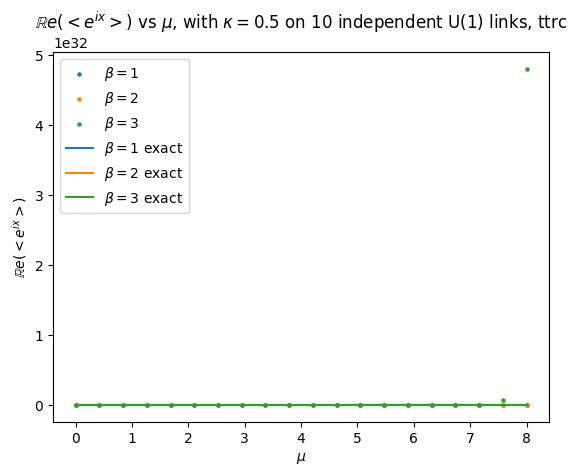

In [ ]:
import matplotlib.pyplot as plt

y_1_exact = [link_count * obs.exp_polyakov_loop(beta=1, mu=m, k=k) for m in mu]
y_2_exact = [link_count * obs.exp_polyakov_loop(beta=2, mu=m, k=k) for m in mu]
y_3_exact = [link_count * obs.exp_polyakov_loop(beta=3, mu=m, k=k) for m in mu]


plt.scatter(mu, np.real(y_ttrc[0]), label=r"$\beta = 1$", s=5)
plt.scatter(mu, np.real(y_ttrc[1]), label=r"$\beta = 2$", s=5)
plt.scatter(mu, np.real(y_ttrc[2]), label=r"$\beta = 3$", s=5)

plt.plot(mu, np.real(y_1_exact), label=r"$\beta = 1$ exact")
plt.plot(mu, np.real(y_2_exact), label=r"$\beta = 2$ exact")
plt.plot(mu, np.real(y_3_exact), label=r"$\beta = 3$ exact")

plt.xlabel(r"$\mu$")
plt.ylabel(r"$\mathbb{R}e(<e^{ix}>)$")
plt.title(r"$\mathbb{R}e(<e^{ix}>)$ vs $\mu$, with $\kappa = 0.5$ on 10 independent U(1) links, ttrc")
plt.legend()
plt.show()

In [8]:
y_greedy = [[], [], []]

for ind, b in enumerate(beta):
    for m in mu:

        def normalization_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=one)

        def expectation_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=obs.polyakov_loop)

        try:
            normalization = greedy_cross_integrator(
                func=normalization_func,
                num_variables=link_count,
                intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
                points_per_variable=20,
                sweeps=3,
                max_bond=10,
                pivot_finder_tol=1e-10,
                is_f_complex=True,
            ).integrate()

            expectation = greedy_cross_integrator(
                func=expectation_func,
                num_variables=link_count,
                intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
                points_per_variable=20,
                sweeps=3,
                max_bond=10,
                pivot_finder_tol=1e-10,
                is_f_complex=True,
            ).integrate()

            y_greedy[ind].append(expectation / normalization)
        except:
            y_greedy[ind].append(np.nan)

Initialization done after time: 0.0013432502746582031 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.00036144256591796875 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.00042724609375 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0003638267517089844 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.0010442733764648438 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.00033736228942871094 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.00067901611328125 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0004076957702636719 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0008931159973144531 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0004296302795410156 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.0010859966278076172 seconds and 1 tries.
Sweep 1
Initialization done after ti

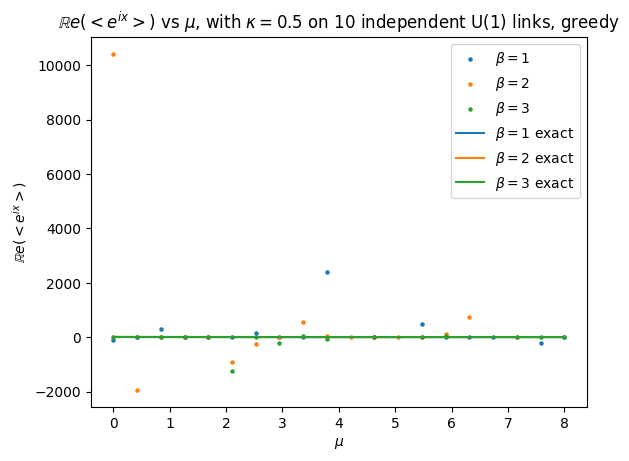

In [9]:
plt.scatter(mu, np.real(y_greedy[0]), label=r"$\beta = 1$", s=5)
plt.scatter(mu, np.real(y_greedy[1]), label=r"$\beta = 2$", s=5)
plt.scatter(mu, np.real(y_greedy[2]), label=r"$\beta = 3$", s=5)

plt.plot(mu, np.real(y_1_exact), label=r"$\beta = 1$ exact")
plt.plot(mu, np.real(y_2_exact), label=r"$\beta = 2$ exact")
plt.plot(mu, np.real(y_3_exact), label=r"$\beta = 3$ exact")

plt.xlabel(r"$\mu$")
plt.ylabel(r"$\mathbb{R}e(<e^{ix}>)$")
plt.title(r"$\mathbb{R}e(<e^{ix}>)$ vs $\mu$, with $\kappa = 0.5$ on 10 independent U(1) links, greedy")
plt.legend()
plt.show()

In [10]:
y_mc = [[], [], []]

mu = np.linspace(0, 8, 20)
beta = [1.0, 2.0, 3.0]
k = 0.5
model = u1n()

link_count = 10


def one(x, **kwargs):
    return 1


for ind, b in enumerate(beta):
    for m in mu:

        def normalization_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=one)

        def expectation_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=obs.polyakov_loop)

        normalization = simple_mc(
            func=normalization_func,
            num_variables=link_count,
            intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
            points_per_variable=20,
        ).integrate(30000)

        expectation = simple_mc(
            func=expectation_func,
            num_variables=link_count,
            intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
            points_per_variable=20,
        ).integrate(30000)

        y_mc[ind].append(expectation / normalization)

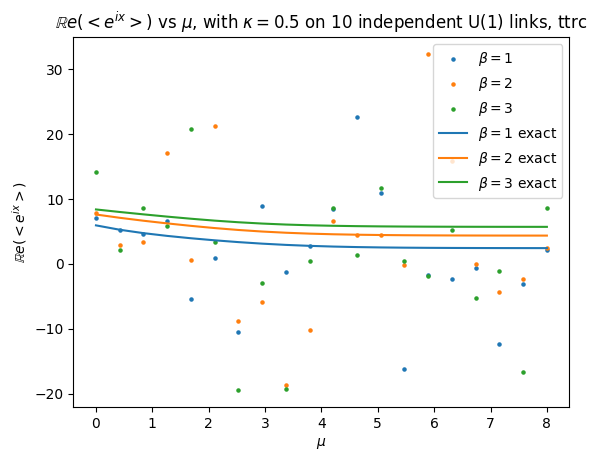

In [11]:
import matplotlib.pyplot as plt

y_1_exact = [link_count * obs.exp_polyakov_loop(beta=1, mu=m, k=k) for m in mu]
y_2_exact = [link_count * obs.exp_polyakov_loop(beta=2, mu=m, k=k) for m in mu]
y_3_exact = [link_count * obs.exp_polyakov_loop(beta=3, mu=m, k=k) for m in mu]


plt.scatter(mu, np.real(y_mc[0]), label=r"$\beta = 1$", s=5)
plt.scatter(mu, np.real(y_mc[1]), label=r"$\beta = 2$", s=5)
plt.scatter(mu, np.real(y_mc[2]), label=r"$\beta = 3$", s=5)

plt.plot(mu, np.real(y_1_exact), label=r"$\beta = 1$ exact")
plt.plot(mu, np.real(y_2_exact), label=r"$\beta = 2$ exact")
plt.plot(mu, np.real(y_3_exact), label=r"$\beta = 3$ exact")

plt.xlabel(r"$\mu$")
plt.ylabel(r"$\mathbb{R}e(<e^{ix}>)$")
plt.title(r"$\mathbb{R}e(<e^{ix}>)$ vs $\mu$, with $\kappa = 0.5$ on 10 independent U(1) links, ttrc")
plt.legend()
plt.show()

### Sum of Plaquette expected value for N independent U(1) links

In [1]:
y_ttrc = [[], [], []]

mu_i = 1j * np.linspace(-8, 0, 10)
mu_r = np.linspace(0, 8, 10)

mu = np.concatenate((mu_i, mu_r))

mu_squared = mu**2

beta = [1.0, 2.0, 3.0]
k = 0.5
model = u1n()

link_count = 20


def one(x, **kwargs):
    return 1


for ind, b in enumerate(beta):
    for m in mu:
        try:

            def normalization_func(x_arr):
                return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=one) / (10**link_count)

            def expectation_func(x_arr):
                return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=obs.plaquette) / (10**link_count)

            normalization = ttrc_integrator(
                func=normalization_func,
                num_variables=link_count,
                intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
                points_per_variable=10,
                sweeps=2,
                initial_bond_guess=2,
                max_bond=10,
                maxvol_tol=1e-5,
                truncation_tol=1e-10,
                is_f_complex=True,
            ).integrate()

            expectation = ttrc_integrator(
                func=expectation_func,
                num_variables=link_count,
                intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
                points_per_variable=10,
                sweeps=2,
                initial_bond_guess=2,
                max_bond=10,
                maxvol_tol=1e-5,
                truncation_tol=1e-10,
                is_f_complex=True,
            ).integrate()

            y_ttrc[ind].append(expectation / normalization)
        except:
            y_ttrc[ind].append(np.nan)

NameError: name 'np' is not defined

/home/ptbadia/miniconda3/envs/tfg/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ptbadia/miniconda3/envs/tfg/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/ptbadia/miniconda3/envs/tfg/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


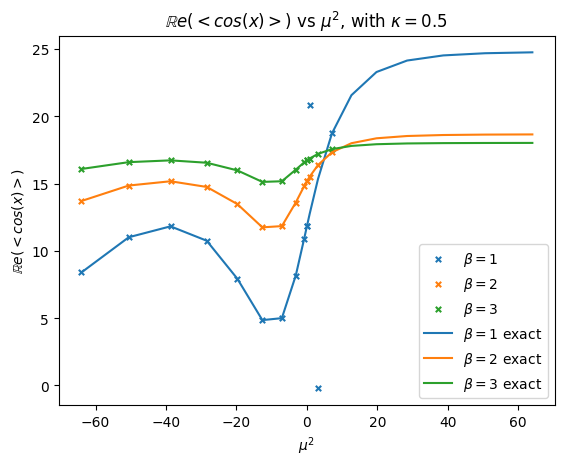

In [11]:
y_1_exact = [link_count * obs.exp_plaquette(beta=1, mu=m, k=k) for m in mu]
y_2_exact = [link_count * obs.exp_plaquette(beta=2, mu=m, k=k) for m in mu]
y_3_exact = [link_count * obs.exp_plaquette(beta=3, mu=m, k=k) for m in mu]

plt.scatter(mu_squared, y_ttrc[0], label=r"$\beta = 1$", s=15, marker="x")
plt.scatter(mu_squared, y_ttrc[1], label=r"$\beta = 2$", s=15, marker="x")
plt.scatter(mu_squared, y_ttrc[2], label=r"$\beta = 3$", s=15, marker="x")

plt.plot(mu_squared, y_1_exact, label=r"$\beta = 1$ exact")
plt.plot(mu_squared, y_2_exact, label=r"$\beta = 2$ exact")
plt.plot(mu_squared, y_3_exact, label=r"$\beta = 3$ exact")

plt.xlabel(r"$\mu^2$")
plt.ylabel(r"$\mathbb{R}e(<cos(x)>)$")
plt.title(r"$\mathbb{R}e(<cos(x)>)$ vs $\mu^2$, with $\kappa = 0.5$")
plt.legend()
plt.show()

In [6]:
y_greedy = [[], [], []]

for ind, b in enumerate(beta):
    for m in mu:

        def normalization_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=one)

        def expectation_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=obs.density)

        try:
            normalization = greedy_cross_integrator(
                func=normalization_func,
                num_variables=link_count,
                intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
                points_per_variable=20,
                sweeps=6,
                max_bond=10,
                pivot_finder_tol=1e-10,
                is_f_complex=True,
            ).integrate()

            expectation = greedy_cross_integrator(
                func=expectation_func,
                num_variables=link_count,
                intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
                points_per_variable=20,
                sweeps=6,
                max_bond=10,
                pivot_finder_tol=1e-10,
                is_f_complex=True,
            ).integrate()

            y_greedy[ind].append(expectation / normalization)

        except:
            y_greedy[ind].append(np.nan)

Initialization done after time: 0.0004904270172119141 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.001428365707397461 seconds and 1 tries.
Sweep 1
Sweep 2
Initialization done after time: 0.0004591941833496094 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0004956722259521484 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.0003693103790283203 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0007228851318359375 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5
Initialization done after time: 0.00042057037353515625 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0004417896270751953 seconds and 1 tries.
Sweep 1
Sweep 2
Initialization done after time: 0.00040459632873535156 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.001195669174194336 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Initialization done after time: 0.0004184246063232422 seconds and 1 tries.
Sweep 1

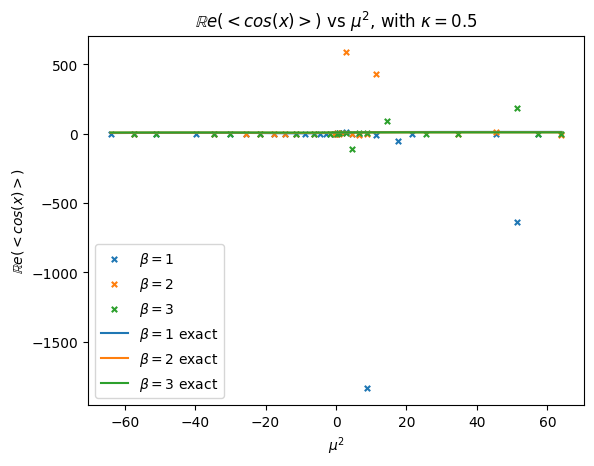

In [10]:
y_1_exact = [link_count * obs.exp_plaquette(beta=1, mu=m, k=k) for m in mu]
y_2_exact = [link_count * obs.exp_plaquette(beta=2, mu=m, k=k) for m in mu]
y_3_exact = [link_count * obs.exp_plaquette(beta=3, mu=m, k=k) for m in mu]

plt.scatter(mu_squared, np.real(y_greedy[0]), label=r"$\beta = 1$", s=15, marker="x")
plt.scatter(mu_squared, np.real(y_greedy[1]), label=r"$\beta = 2$", s=15, marker="x")
plt.scatter(mu_squared, np.real(y_greedy[2]), label=r"$\beta = 3$", s=15, marker="x")

plt.plot(mu_squared, y_1_exact, label=r"$\beta = 1$ exact")
plt.plot(mu_squared, y_2_exact, label=r"$\beta = 2$ exact")
plt.plot(mu_squared, y_3_exact, label=r"$\beta = 3$ exact")

plt.xlabel(r"$\mu^2$")
plt.ylabel(r"$\mathbb{R}e(<cos(x)>)$")
plt.title(r"$\mathbb{R}e(<cos(x)>)$ vs $\mu^2$, with $\kappa = 0.5$")
plt.legend()
plt.show()